In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#giúp chạy biểu đồ ra cửa sổ mới
import seaborn as sns

In [14]:
df = pd.read_csv('flight.csv')

df.head()

,id,code,code_name,f_code,f_time_from,f_time_to,f_price,fees,total_price,from,airport_from,to,airport_to,type
0,vj16169846100,vj,Vietjet,VJ122,04:50:00 01/04/2021,07:10:00 01/04/2021,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
1,vna16169846200,vna,Vietnam Airlines,VN250,05:00:00 01/04/2021,07:10:00 01/04/2021,299000,670000,969000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Economy (EL)-P
2,vj16169846231,vj,Vietjet,VJ176,05:25:00 01/04/2021,07:35:00 01/04/2021,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco
3,qh16169846270,qh,Bamboo Airways,QH202,05:45:00 01/04/2021,07:55:00 01/04/2021,399000,672000,1071000,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco Saver
4,vj16169846302,vj,Vietjet,VJ120,06:00:00 01/04/2021,08:10:00 01/04/2021,199000,650900,849900,TP HCM,Tân Sơn Nhất (SGN),Hà Nội,Nội Bài (HAN),Eco


In [15]:
#dua data ve datetime
format_type = '%H:%M:%S %d/%m/%Y'
df['f_time_from'] = pd.to_datetime(df['f_time_from'], format=format_type)
df['f_time_to'] = pd.to_datetime(df['f_time_to'], format=format_type)

df['hour'] = df['f_time_from'].dt.hour
df['day_of_week'] = df['f_time_from'].dt.day_of_week
df['day'] = df['f_time_from'].dt.day
df['month'] = df['f_time_from'].dt.month

#tinh tg bay
df['duration_minutes'] =  (df['f_time_to'] - df['f_time_from']).dt.total_seconds() / 60

In [16]:
#lọc dữ liệu về binary để đưa vào model
features = ['code_name', 'from', 'to', 'type']
#drop_first để tránh dư thừa dữ liệu VD: nếu là C thì xóa hết A, B, D
df_encode = pd.get_dummies(df, columns=features, drop_first=True)

print(df_encode.shape)
df_encode.head()

(19846, 84)


,id,code,f_code,f_time_from,f_time_to,f_price,fees,total_price,airport_from,airport_to,...,type_Nfleow (N) - Vé được hoàn,type_Ofleow (O) - Vé được hoàn,type_Promo1 (P) - Vé không hoàn,type_Qfleow (Q) - Vé được hoàn,type_Rfleow (R) - Vé được hoàn,type_Sfleow (S) - Vé được hoàn,type_SkyBoss,type_Tfleow (T) - Vé được hoàn,type_Vfleow (V) - Vé được hoàn,type_Yfleow (Y) - Vé được hoàn
0,vj16169846100,vj,VJ122,2021-04-01 04:50:00,2021-04-01 07:10:00,199000,650900,849900,Tân Sơn Nhất (SGN),Nội Bài (HAN),...,False,False,False,False,False,False,False,False,False,False
1,vna16169846200,vna,VN250,2021-04-01 05:00:00,2021-04-01 07:10:00,299000,670000,969000,Tân Sơn Nhất (SGN),Nội Bài (HAN),...,False,False,False,False,False,False,False,False,False,False
2,vj16169846231,vj,VJ176,2021-04-01 05:25:00,2021-04-01 07:35:00,199000,650900,849900,Tân Sơn Nhất (SGN),Nội Bài (HAN),...,False,False,False,False,False,False,False,False,False,False
3,qh16169846270,qh,QH202,2021-04-01 05:45:00,2021-04-01 07:55:00,399000,672000,1071000,Tân Sơn Nhất (SGN),Nội Bài (HAN),...,False,False,False,False,False,False,False,False,False,False
4,vj16169846302,vj,VJ120,2021-04-01 06:00:00,2021-04-01 08:10:00,199000,650900,849900,Tân Sơn Nhất (SGN),Nội Bài (HAN),...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_encode.columns

Index(['id', 'code', 'f_code', 'f_time_from', 'f_time_to', 'f_price', 'fees',
       'total_price', 'airport_from', 'airport_to', 'hour', 'day_of_week',
       'day', 'month', 'duration_minutes', 'code_name_Pacific Airlines',
       'code_name_Vietjet', 'code_name_Vietnam Airlines',
       'code_name_Vietravel Airlines', 'from_Cần Thơ', 'from_Huế',
       'from_Hà Nội', 'from_Hải Phòng', 'from_Nha Trang', 'from_Phú Quốc',
       'from_Quy Nhơn', 'from_TP HCM', 'from_Thanh Hóa', 'from_Vinh',
       'from_Đà Lạt', 'from_Đà Nẵng', 'to_Cần Thơ', 'to_Huế', 'to_Hà Nội',
       'to_Hải Phòng', 'to_Nha Trang', 'to_Phú Quốc', 'to_Quy Nhơn',
       'to_TP HCM', 'to_Thanh Hóa', 'to_Vinh', 'to_Đà Lạt', 'to_Đà Nẵng',
       'type_Bregow (B) - Vé không hoàn', 'type_Business (BC)-D',
       'type_Business (BC)-I', 'type_Business (BF)-C', 'type_Business (BF)-J',
       'type_Buz Flex', 'type_Buz smart', 'type_Cregow (C) - Vé không hoàn',
       'type_Dregow (D) - Vé không hoàn', 'type_Eco', 'type_Eco 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
drop_cols = ['id', 'code', 'f_code', 'f_time_from', 'f_time_to',
                'f_price', 'fees', 'total_price', 'airport_from', 'airport_to']
#X: dau vao
#Y: Muc tieu train

X = df_encode.drop(columns=drop_cols)
Y = df_encode['total_price']
# 20%: de test, 80%: de hoc
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Số lượng vé dùng để học: {len(X_train)}")
print(f"Số lượng vé dùng để thi: {len(X_test)}")

#Khoi tao va huan luyen mo hinh
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
#X_train: Các thông tin chuyến bay (Hãng, giờ bay...).
#y_train: Giá vé thực tế tương ứng.

print("Da Hoc Xong!\n")
#print(regressor.coef_) #he so hoi quy
#print(regressor.intercept_) #he so chan


#X_test: dự đoán giá vé từ dataframe nhưng thiếu cột total_price(tránh việc sao chép giá mà không dự đoán)
y_predict = regressor.predict(X_test)

#so sánh total_price với total_price_predict
score = r2_score(Y_test, y_predict)

print(f"Do Chinh Xac(R2 score) = {score}")

Số lượng vé dùng để học: 15876
Số lượng vé dùng để thi: 3970
Da Hoc Xong!

Do Chinh Xac(R2 score) = 0.7387789362733008


Trung bình lệch: 201310.54307577672 VND


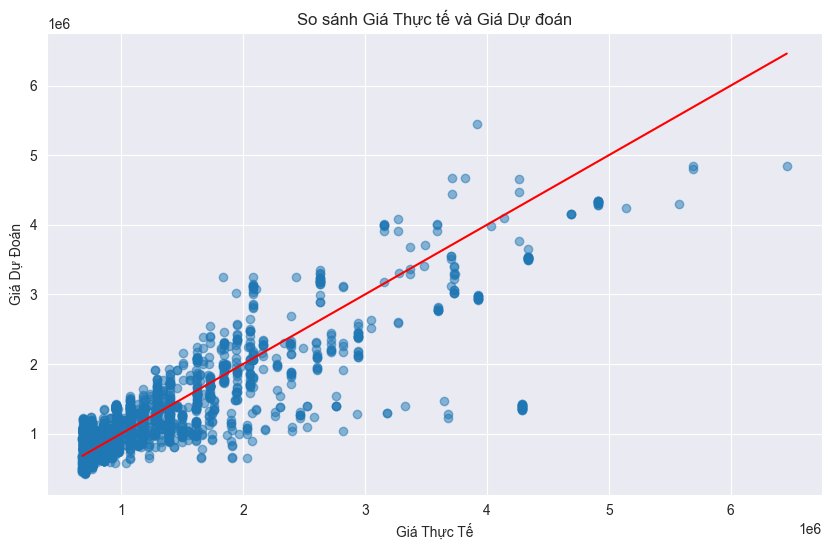

In [20]:
#Tinh sai số
from sklearn.metrics import mean_absolute_error

#Sai số trung bình(MAE)
mae = mean_absolute_error(Y_test, y_predict)
print(f"Trung bình lệch: {mae} VND")

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_predict, alpha=0.5) #cham tron
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')
plt.xlabel('Giá Thực Tế')
plt.ylabel('Giá Dự Đoán')
plt.title('So sánh Giá Thực tế và Giá Dự đoán')
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def du_doan_gia_ve(hang_bay, diem_di, diem_den, loai_ve, gio_di, gio_den):
    # Tạo dataframe cho dữ liệu đầu vào mới
    input_df = pd.DataFrame({
        'code_name': [hang_bay],
        'from': [diem_di],
        'to': [diem_den],
        'type': [loai_ve],
        'f_time_from': [pd.to_datetime(gio_di, format=format_type)],
        'f_time_to': [pd.to_datetime(gio_den, format=format_type)],
    })

    #tái tạo lại dữ liệu
    input_df['duration_minutes'] = (input_df['f_time_to'] - input_df['f_time_from']).dt.total_seconds() / 60
    input_df['hour'] = input_df['f_time_from'].dt.hour
    input_df['day_of_week'] = input_df['f_time_from'].dt.day_of_week
    input_df['day'] = input_df['f_time_from'].dt.day
    input_df['month'] = input_df['f_time_from'].dt.month

    input_encoded = pd.get_dummies(input_df, columns=['code_name', 'from', 'to', 'type'])

    # đồng bộ cột(làm khớp cấu trúc dữ liệu
    # Tự động điền 0 vào các cột thiếu bằng fill_value=0
    # X_train.columns: 84 cột
    final_input = input_encoded.reindex(columns=X_train.columns, fill_value=0)

    #đoán giá
    predicted_price = regressor.predict(final_input)[0]

    return predicted_price

In [23]:
import ipywidgets as widgets
from IPython.display import display

# Lấy danh sách lựa chọn từ dữ liệu gốc
ds_hang = df['code_name'].unique().tolist()
ds_diem_di = df['from'].unique().tolist()
ds_diem_den = df['to'].unique().tolist()
ds_loai_ve = df['type'].unique().tolist()

# Tạo Widgets
w_hang = widgets.Dropdown(options=ds_hang, description='Hãng bay:')
w_di = widgets.Dropdown(options=ds_diem_di, description='Điểm đi:', value='Hà Nội')
w_den = widgets.Dropdown(options=ds_diem_den, description='Điểm đến:', value='TP HCM')
w_loai = widgets.Dropdown(options=ds_loai_ve, description='Loại vé:', value='Eco')
w_gio_di = widgets.Text(description='Giờ đi:', value='08:00:00 15/05/2021')
w_gio_den = widgets.Text(description='Giờ đến:', value='10:10:00 15/05/2021')
btn = widgets.Button(description="Dự đoán ngay!", button_style='success', icon='plane')
output = widgets.Output()

# Xử lý sự kiện bấm nút
def on_click_predict(b):
    with output:
        output.clear_output()
        try:
            gia = du_doan_gia_ve(
                hang_bay=w_hang.value,
                diem_di=w_di.value,
                diem_den=w_den.value,
                loai_ve=w_loai.value,
                gio_di=w_gio_di.value,
                gio_den=w_gio_den.value
            )
            print(f"Giá vé dự đoán: {gia:,.0f} VNĐ")
        except Exception as e:
            print(f"Lỗi định dạng ngày tháng hoặc dữ liệu: {e}")

btn.on_click(on_click_predict)

# Hiển thị
print("--- ỨNG DỤNG DỰ ĐOÁN GIÁ VÉ ---")
display(w_hang, w_di, w_den, w_loai, w_gio_di, w_gio_den, btn, output)

--- ỨNG DỤNG DỰ ĐOÁN GIÁ VÉ ---


Dropdown(description='Hãng bay:', options=('Vietjet', 'Vietnam Airlines', 'Bamboo Airways', 'Pacific Airlines'…

Dropdown(description='Điểm đi:', index=1, options=('TP HCM', 'Hà Nội', 'Hải Phòng', 'Đà Nẵng', 'Phú Quốc', 'Nh…

Dropdown(description='Điểm đến:', index=1, options=('Hà Nội', 'TP HCM', 'Hải Phòng', 'Đà Nẵng', 'Phú Quốc', 'N…

Dropdown(description='Loại vé:', options=('Eco', 'Economy (EL)-P', 'Eco Saver', 'Economy (EC)-T', 'Economy (EC…

Text(value='08:00:00 15/05/2021', description='Giờ đi:')

Text(value='10:10:00 15/05/2021', description='Giờ đến:')

Button(button_style='success', description='Dự đoán ngay!', icon='plane', style=ButtonStyle())

Output()

In [24]:
# Luu model
import joblib
joblib.dump(regressor, 'linear_regression_model.pkl')

['linear_regression_model.pkl']